In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

## The dot motion paradigm

An experimental participant is presented with the following visual stimulus, except that all the dots are the same colour. They see about 20 dots moving in random directions, except for two of these which have "motion coherence," which means that they are moving in the same direction. So the movement is random, except for the 10% which are coherent. The participant does not know which direction is the coherent one. Their task is to give a response (e.g., look left or look right) when they are able to perceive the coherent motion.

![dot motion paradigm](files/figure11.svg)

## Normal distribution plot

The plot below represents the perceptual evidence associated with the stimuli. Perceptual processes are noisy, which means that they are prone to error. That means that we represent them with a normal distribution. Perceptual signals are sampled from this distribution.

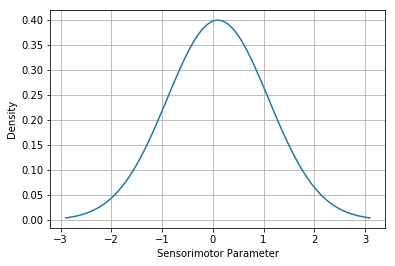

In [3]:
# Generate the distribution

mu = 0.1
variance = 1
sigma = math.sqrt(variance)

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

# Style the plot

plt.grid(b=True)
plt.style.use('fast')

plt.ylabel('Density')
plt.xlabel('Sensorimotor Parameter')

plt.show()

## Diffusion-to-bound model

The diffusion-to-bound model of perception construes it as process of evidence accumulation under uncertainty. The participant has to make a choice about whether the coherent movement is to the left or to the right. As the dots move the participant acquires perceptual evidence which may indicate towards one direction or another. However, this evidence is not certain, and there is a margin of error which the system takes into account. The system accumulates evidence until the weight of evidence (the "decision variable") reaches a threshold (a bound), at which stage a "perceptual decision" is made and a signal propagates to produce a response.

In [4]:
# Simulating an experimental setup to run a set of trials
class DiffusionToBound:
    def __init__(self, bound, decision_variable, mu, sigma):
        self.bound = bound
        self.decision_variable = decision_variable
        self.mu = mu
        self.sigma = sigma
        self.trials = []
    
    def run_trials(self, n = 1):
        for i in range(n):
            dv = self.decision_variable
            trial = [dv]
            while abs(dv) < self.bound:
                evidence = stats.norm.rvs(loc=self.mu, scale=self.sigma)
                dv += evidence
                trial.append(dv)
            self.trials.append(trial)
        return self.trials


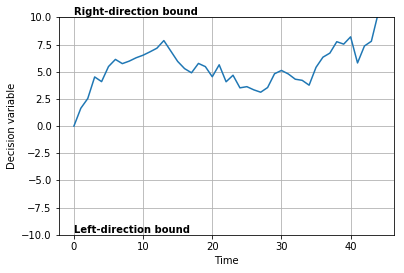

In [5]:
# Plotting a single trial

diff = DiffusionToBound(10, 0, mu, sigma)
data = diff.run_trials()[0]
total_time = len(data)

plt.plot(data)

plt.grid(b=True)
plt.style.use('fast')

plt.ylim(-10, 10)
plt.xlabel('Time')
plt.ylabel('Decision variable')

plt.text(0, 10.2, "Right-direction bound", fontweight="bold")
plt.text(0, -9.8, "Left-direction bound", fontweight="bold")

plt.show()

## Low precision indicates perceptual uncertainty

The below figure shows two distributions representing two sensorimotor signals. The one on the right is noiser than the one on the left and has less precision; the value it represents is much more uncertain.

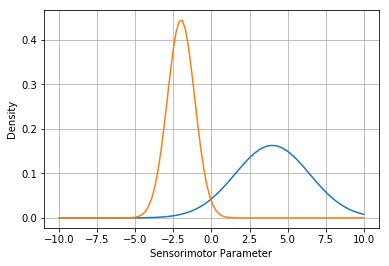

In [7]:
# Generate the distribution

mu = 4
variance = 6
sigma = math.sqrt(variance)

prec_mu = -2
variance = 0.8
prec_sigma = math.sqrt(variance)

x = np.linspace(-10, 10, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.plot(x, stats.norm.pdf(x, prec_mu, prec_sigma))

# Style the plot

plt.grid(b=True)

plt.ylabel('Density')
plt.xlabel('Sensorimotor Parameter')

plt.show()